In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from itertools import combinations
from collections import Counter
import matplotlib.pyplot as plt
from transformers import OpenAIGPTTokenizer




In [94]:
'''
Using the openai-gpt model to decode the data back into strings (for ease of interpretation)
Decided to do this using the preprocessed data instead of trying to muck around with the raw data
'''
tokenizer = OpenAIGPTTokenizer.from_pretrained('openai-gpt', unk_token='')

In [179]:
#Read in the ingredient map, then remove duplicate rows and reindex to use the ingredient ID

ingr_map = pd.read_pickle(filepath_or_buffer='ingr_map.pkl')

display(ingr_map)

ingr_map = ingr_map.filter(['replaced','count','id', 'processed'])

ingr_map_clean = ingr_map.drop_duplicates(subset='id').set_index('id')

display(ingr_map_clean)

,raw_ingr,raw_words,processed,len_proc,replaced,count,id
0,"medium heads bibb or red leaf lettuce, washed,...",13,"medium heads bibb or red leaf lettuce, washed,...",73,lettuce,4507,4308
1,mixed baby lettuces and spring greens,6,mixed baby lettuces and spring green,36,lettuce,4507,4308
2,romaine lettuce leaf,3,romaine lettuce leaf,20,lettuce,4507,4308
3,iceberg lettuce leaf,3,iceberg lettuce leaf,20,lettuce,4507,4308
4,red romaine lettuce,3,red romaine lettuce,19,lettuce,4507,4308
...,...,...,...,...,...,...,...
11654,soybeans,1,soybean,7,soybean,31,6702
11655,goose,1,goose,5,goose,8,3318
11656,ajwain,1,ajwain,6,ajwain,13,47
11657,brinjals,1,brinjal,7,brinjal,2,750


,replaced,count,processed
id,,,
4308,lettuce,4507,"medium heads bibb or red leaf lettuce, washed,..."
2744,french vanilla pudding and pie filling mix,5,french vanilla pudding and pie filling mix
6843,stove top stuffing mix,114,stove top stuffing mix
1910,cream cheese,9915,chive & onion 1/3 less fat than cream cheese
1168,cheddar,13304,shredded triple cheddar cheese
...,...,...,...
6702,soybean,31,soybean
3318,goose,8,goose
47,ajwain,13,ajwain


In [161]:
#Function that takes a string representation of tokens, cleans/splits/ints them, then returns the decoded tokens

def decode_name_tokens(val: str):
  seq = [int(x.strip('[] ')) for x in val.split(',')]
  return tokenizer.decode(seq)

#Function that takes the string representation of the list of ingredient IDs, returns a new list of strings with the ingredient names

def map_ingredients(ings: str):
  int_list = [int(x.strip('[] ')) for x in ings.split(',')]
  return [ingr_map_clean.loc[id][0] for id in int_list]

In [165]:
df1 = pd.read_csv('PP_recipes.csv', delimiter=',', usecols=['id','i','name_tokens','ingredient_tokens','steps_tokens','ingredient_ids'],
        converters={   
        "name_tokens" : decode_name_tokens,
        "ingredient_ids" : map_ingredients
         })

C:\Users\Calvin\AppData\Local\Temp\ipykernel_19308\1978008609.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return [ingr_map_clean.loc[id][0] for id in int_list]


In [166]:
df1

,id,i,name_tokens,ingredient_tokens,steps_tokens,ingredient_ids
0,424415,23,aromatic basmati rice rice cooker,"[[2911, 1019, 249, 6878], [1353], [6953], [153...","[40480, 40482, 21662, 481, 6878, 500, 246, 161...","[basmati rice, water, salt, cinnamon stick, gr..."
1,146223,96900,pumpkin pie a la easy,"[[17918], [25916], [2507, 6444], [8467, 1179],...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[flmy, oat, brown sugar, pecan, butter, egg, s..."
2,312329,120056,cheesy tomato soup with potatoes,"[[5867, 24176], [1353], [6953], [1301, 11332],...","[40480, 40482, 8240, 481, 24176, 296, 1353, 66...","[chicken broth, water, salt, black pepper, oni..."
3,74301,168258,mini tacos,"[[1270, 1645, 28447], [21601], [27952, 29471, ...","[40480, 40482, 5539, 21601, 1073, 903, 2324, 4...","[wonton wrapper, hamburger, taco seasoning, sa..."
4,76272,109030,rosemary s hanky panky s,"[[1430, 11434], [1430, 17027], [1615, 23, 695,...","[40480, 40482, 14046, 1430, 11434, 488, 17027,...","[ground beef, sausage, velveeta cheese, ature ..."
...,...,...,...,...,...,...
178260,323143,76862,sugar free snickerdoodles,"[[8780], [11835, 1762, 4465, 31494], [6812], [...","[40480, 40482, 729, 2525, 715, 485, 26641, 404...","[butter, artificial sweetener, egg, flmy, crea..."
178261,149114,145962,sausage pancake strata,"[[6812], [5940], [30645, 4785, 6821], [6953], ...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[egg, milk, cheddar, salt, sausage, syrup]"
178262,34200,65066,baked beef patties,"[[6167, 20930, 510], [1353], [15022, 6953], [6...","[40480, 40482, 500, 246, 1719, 5024, 240, 2366...","[dried thyme, water, garlic salt, dried oregan..."
178263,30618,77358,good and garlicky sweet and sour pork,"[[12395, 38308, 40118], [3137, 15022], [30878,...","[40480, 40482, 562, 481, 10734, 240, 23667, 58...","[pork tenderloin, fresh garlic, pineapple chun..."


In [182]:
#Exports a csv of only the id, recipe name, and ingredients list

#df1.to_csv('recipetest.csv', columns=['id','name_tokens','ingredient_ids'])

<h4> Just looking at some of the data </h4>

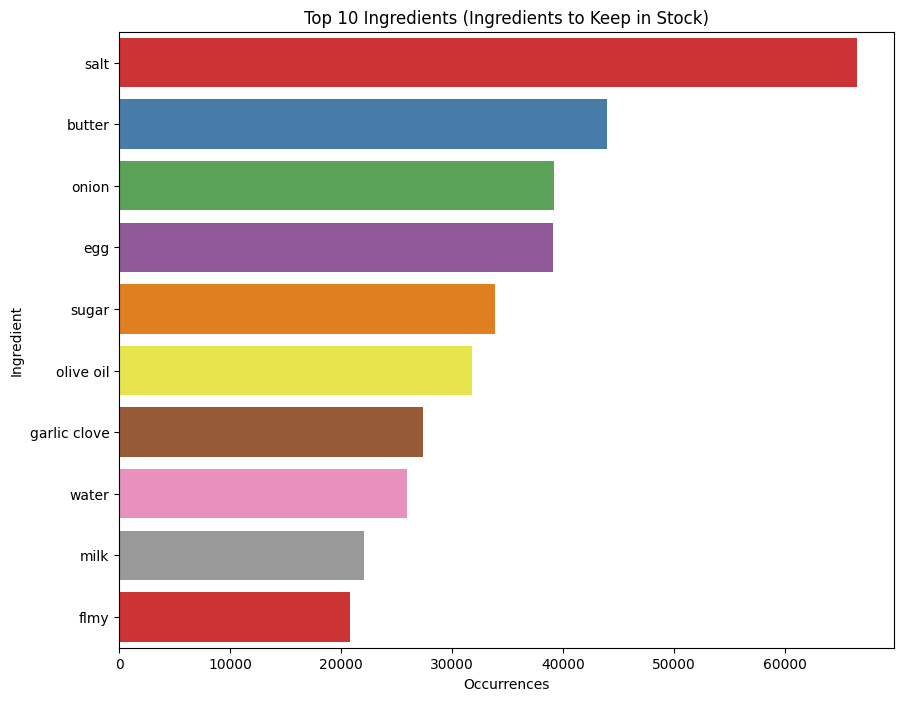

In [218]:
ing_freq = Counter([ingredient for list in df1['ingredient_ids']  
                                    for ingredient in list])

top10_ings = ing_freq.most_common(10)

plt.figure(figsize=(10, 8))
sns.barplot(x=[count[1] for count in top10_ings], y=[ingredient[0] for ingredient in top10_ings], palette='Set1', hue=[ingredient[0] for ingredient in top10_ings])
plt.xlabel('Occurrences')
plt.ylabel('Ingredient')
plt.title('Top 10 Ingredients (Ingredients to Keep in Stock)')
plt.show()

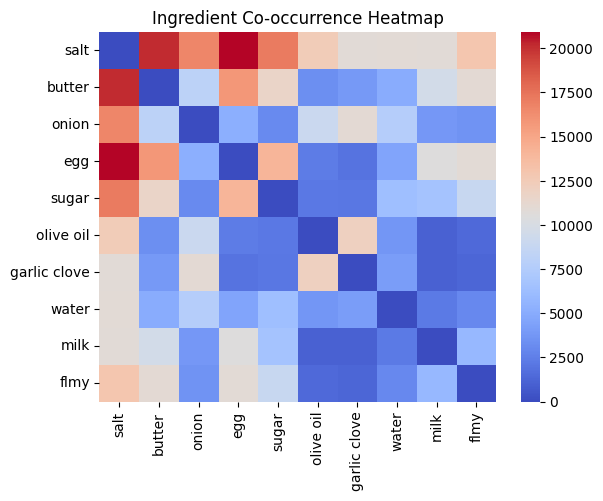

'\nA bit skewed due to how overwhelming the butter numbers are but still shows us some patterns\n'

In [253]:
#Get a simple list of top 10 ingredients instead of messing around with tuples all the time
top10_list = [ing[0] for ing in top10_ings]

#init empty dataframe as large as original
binary_ings = pd.DataFrame(0, index=df1.index, columns=top10_list)

#binary indicator for if a top10 ingredient present in given recipe
for i, ingredients in enumerate(df1['ingredient_ids']):
    for ingredient in ingredients:
        if ingredient in top10_list:
            binary_ings.at[i, ingredient] = 1

#Product of transpose and itself gives co-occurrences
co_occurrence = binary_ings.T.dot(binary_ings)

for ingredient in top10_list:
    co_occurrence.loc[ingredient, ingredient] = 0

sns.heatmap(co_occurrence, cmap='coolwarm')
plt.title('Ingredient Co-occurrence Heatmap')
plt.show()

'''
A bit skewed due to how overwhelming the butter numbers are but still shows us some patterns
'''

In [219]:
#Find recipes that don't contain any of the top 10 ingredients, then display a sample of them
uniques = df1[~df1['ingredient_ids'].apply(lambda ingredients: any(ingredient[0] in ingredients for ingredient in top10_ings))]

unique_samples = uniques[['name_tokens', 'ingredient_ids']].sample(10)

unique_samples

,name_tokens,ingredient_ids
53229,luscious lunch wrap,"[ham, tortilla, mayonnaise, lettuce, cheese sl..."
164619,chicken kabobs,"[chicken breast half, paprika, dry white wine,..."
20365,quick easy yummy apple pork chop skillet,"[oil, pork chop, apple, apple cider, stove top..."
140195,granny betty s apple salad,"[golden delicious apple, crushed pineapple, ma..."
7588,ribs my way,"[rack of baby-back pork rib, brown sugar, garl..."
55389,strawberries with rum cream,"[strawberry, sour cream, brown sugar, rum]"
172304,melon slush,"[ice cube, cantaloupe, lemon juice, artificial..."
43804,mika s mexican pizza,"[pizza crust, green enchilada sauce, hamburger..."
136686,date and banan compote nakhil wa mooz,"[banana, pitted date, almond, light cream, bro..."
33908,apple cheese quesadilla,"[apple, tortilla, american cheese, artificial ..."


<h4> Obviously there's some discrepancies/ingredients being represented by multiple names (e.g. sugar/granulated sugar, butter/unsalted butter), this shouldn't have an impact on the generative aspect of what we're doing but might come up in the searching? </h4>